Punkt 1 - zainstalowano narzędzia zgodne z wymaganiami

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Iris

Odczyt danych oraz wykres 1

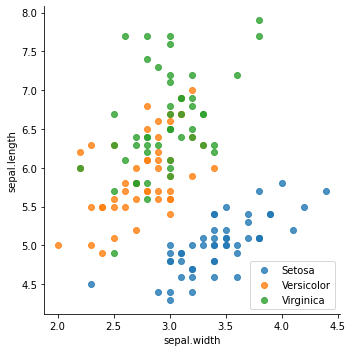

In [2]:
iris = pd.read_csv('data/iris.csv')
sns.lmplot(x="sepal.width", y="sepal.length", data=iris, hue="variety", fit_reg=False, legend=False)
plt.legend()

Wykres 2

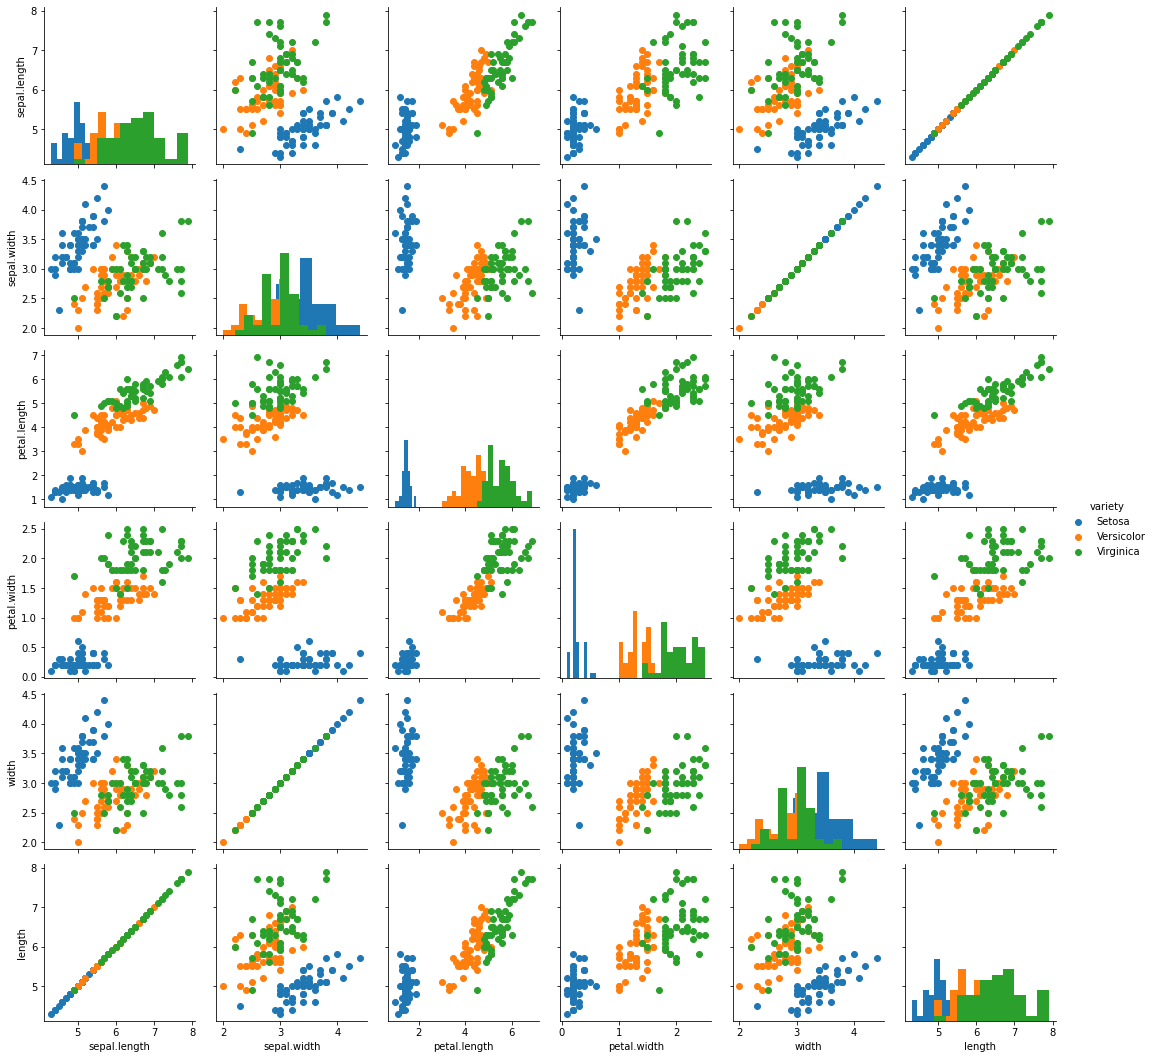

In [3]:
sepal = iris[['sepal.width', 'sepal.length']]
sepal.columns = ['width', 'length']
iris_expanded = pd.concat([iris, sepal], axis = 1)

plot = sns.PairGrid(iris_expanded, hue='variety') 
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot = plot.add_legend()
plt.show()


PCA - kod oparty na tutorialu

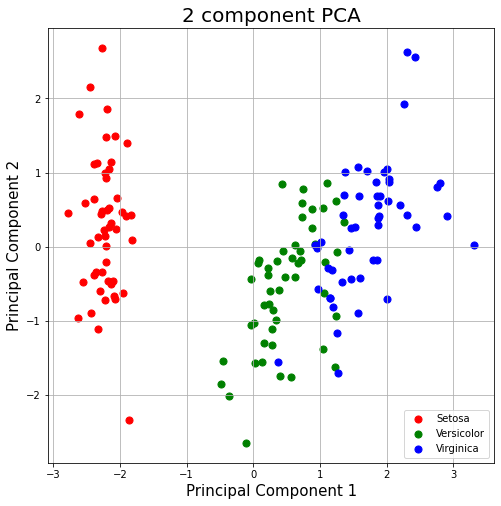

In [4]:
# PCA
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = iris.loc[:, features].values
y = iris.loc[:, ['variety']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, iris[['variety']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['variety'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Wine

Odczyt danych oraz wykres 1

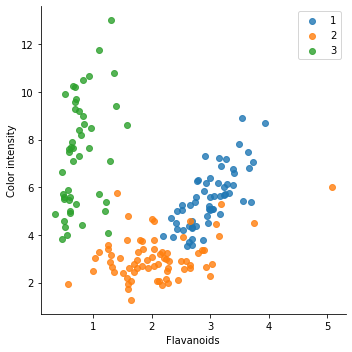

In [5]:
wine = pd.read_csv('data/wine.data', header=None)

wine_col_names = ['Class identifier', 'Alcohol', 'Malic acid', 'Ash', 
                  'Alcalinity of ash', 'Magnesium', 
                  'Total phenols', 'Flavanoids', 
                  'Nonflavanoid phenols', 'Proanthocyanins', 
                  'Color intensity', 'Hue', 
                  'OD280/OD315 of diluted wines', 'Proline']
wine.columns = wine_col_names
sns.lmplot(x="Flavanoids", y="Color intensity", data=wine, hue="Class identifier", fit_reg=False, legend=False)
plt.legend()

Wykres 2

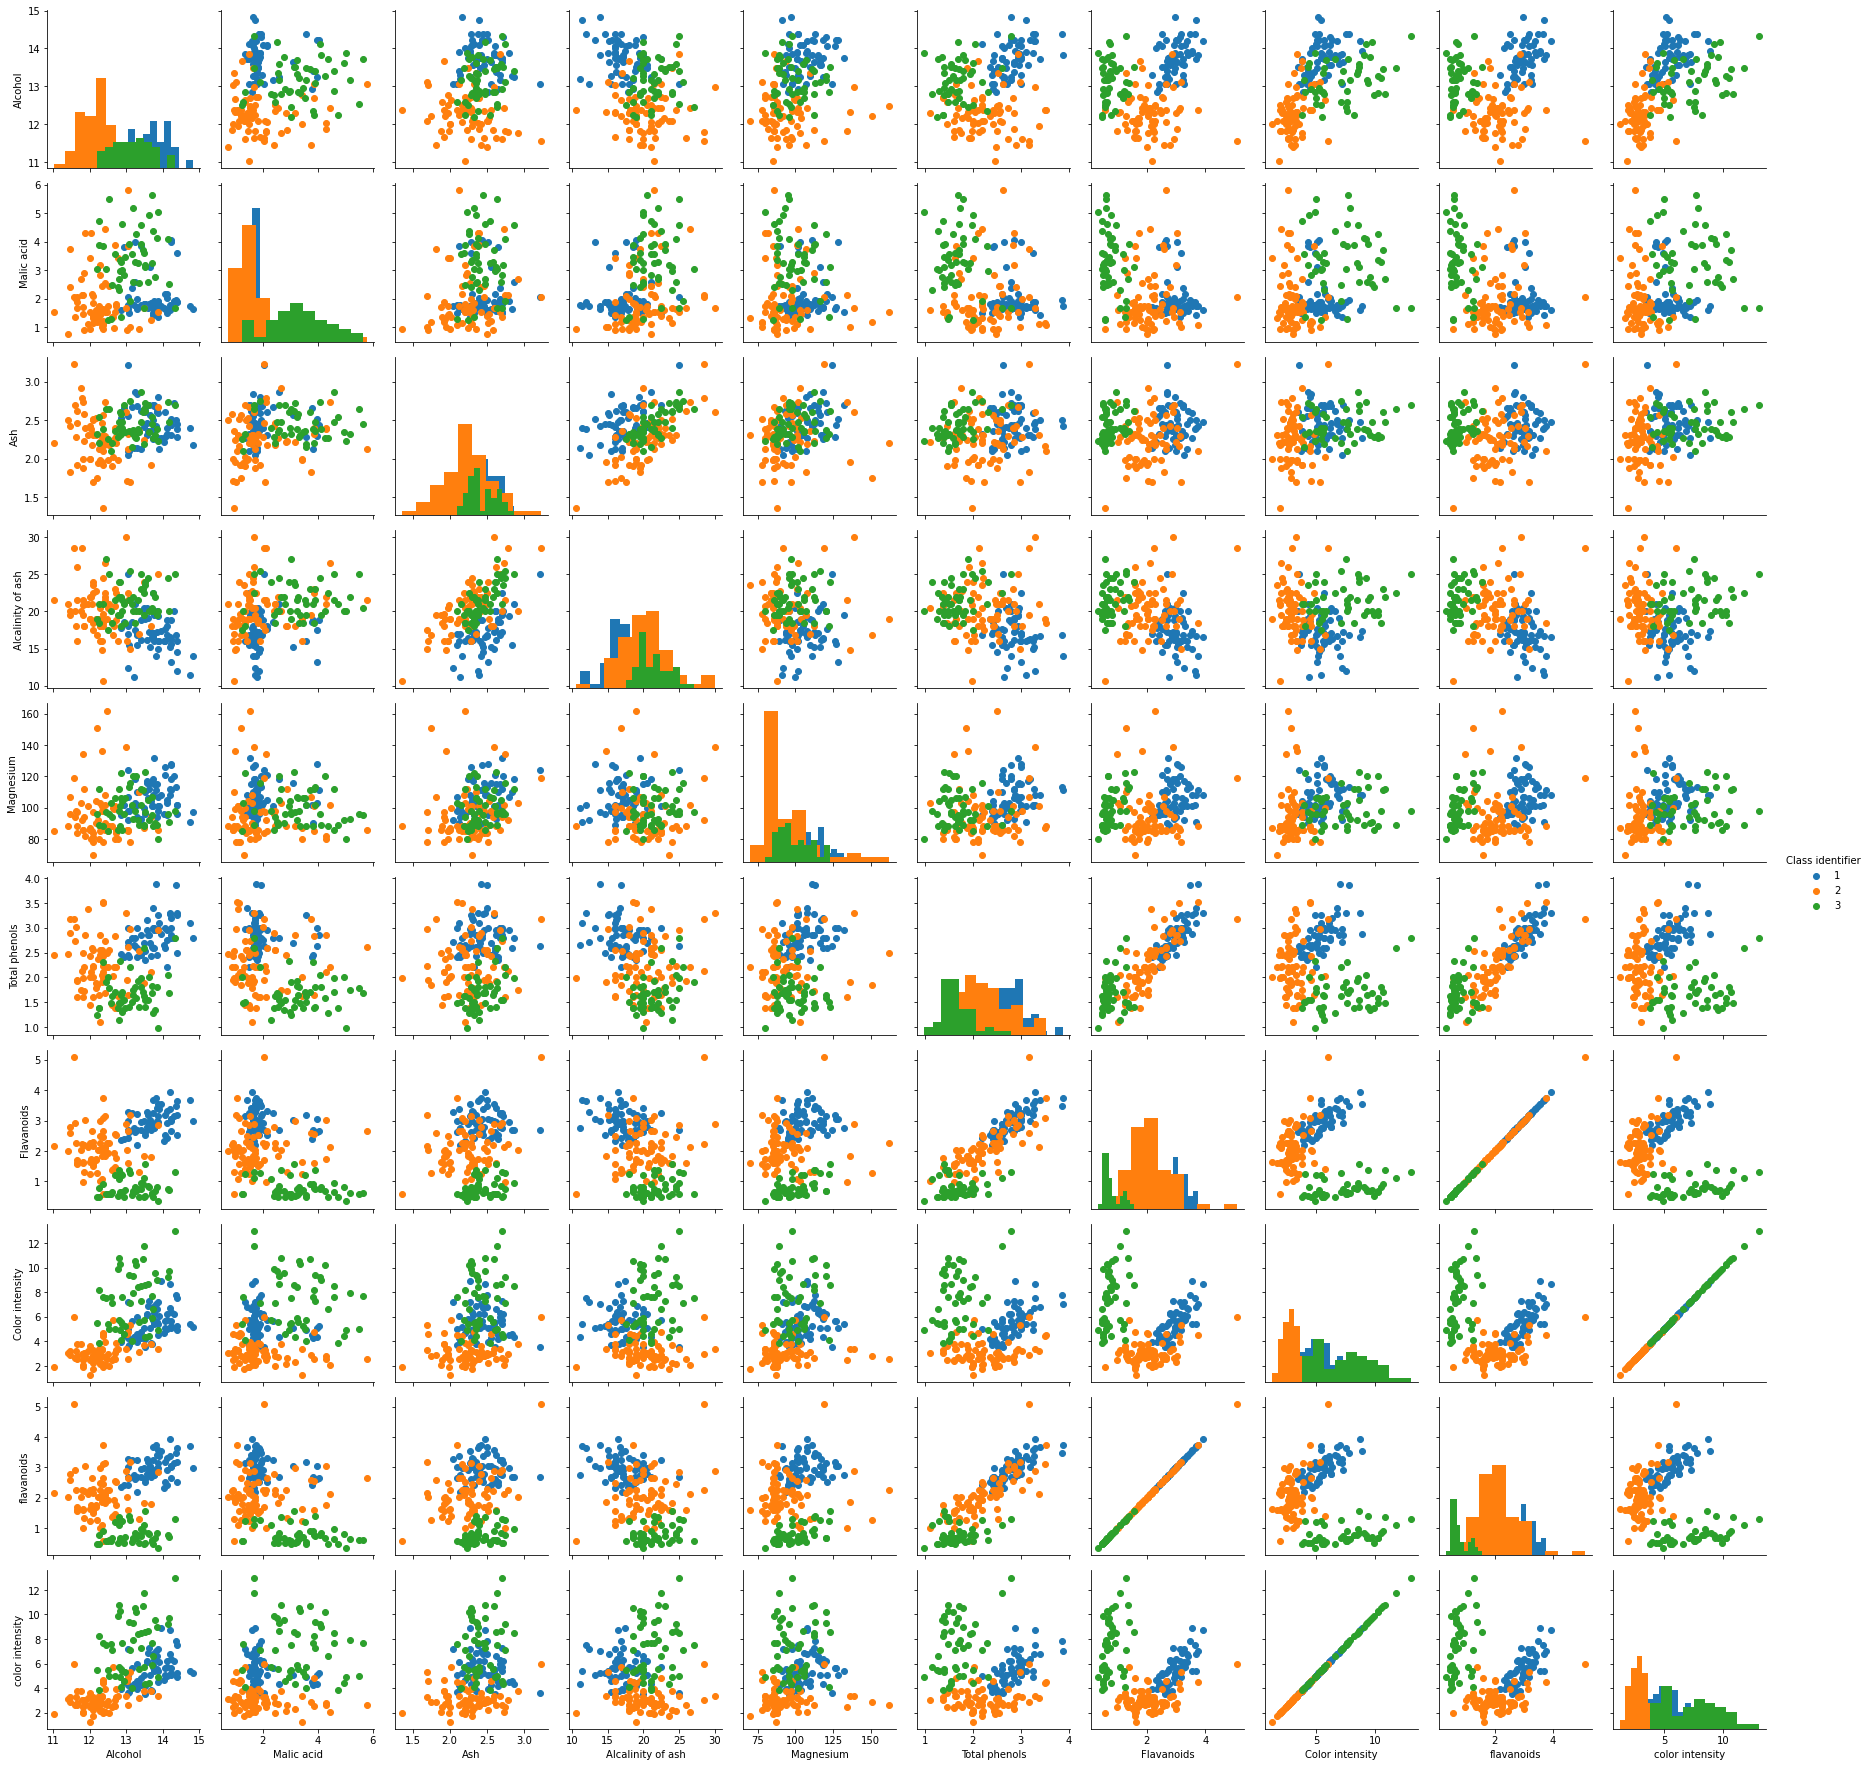

In [6]:
features = ['Alcohol', 'Malic acid', 'Ash', 
                  'Alcalinity of ash', 'Magnesium', 
                  'Total phenols', 'Flavanoids', 
                  'Color intensity']

winee = wine[['Flavanoids', 'Color intensity']]
winee.columns = ['flavanoids', 'color intensity']
wine_expanded = pd.concat([wine[features], wine['Class identifier'], winee], axis = 1)

plot = sns.PairGrid(wine_expanded, hue='Class identifier') 
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot = plot.add_legend()
plt.show()


PCA - kod oparty na tutorialu

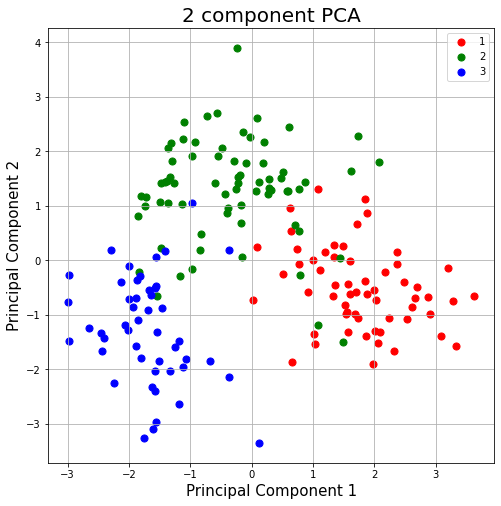

In [7]:
# PCA
x = wine.loc[:, features].values
y = wine.loc[:, ['Class identifier']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, wine[['Class identifier']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class identifier'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Glass

Odczyt danych oraz wykres 1

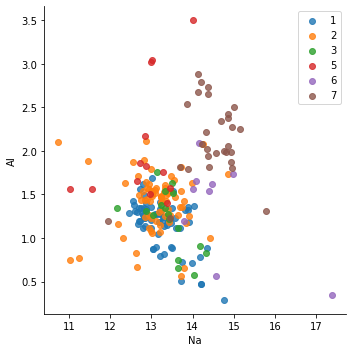

In [9]:
glass = pd.read_csv('data/glass.data')
glass_col_names = ['Id', 'RI', 'Na', 'Mg', 'Al',
                  'Si', 'K', 'Ca', 'Ba', 'Fe', 'type']
glass.columns = glass_col_names
sns.lmplot(x="Na", y="Al", data=glass, hue="type", fit_reg=False, legend=False)
plt.legend()

Wykres 2

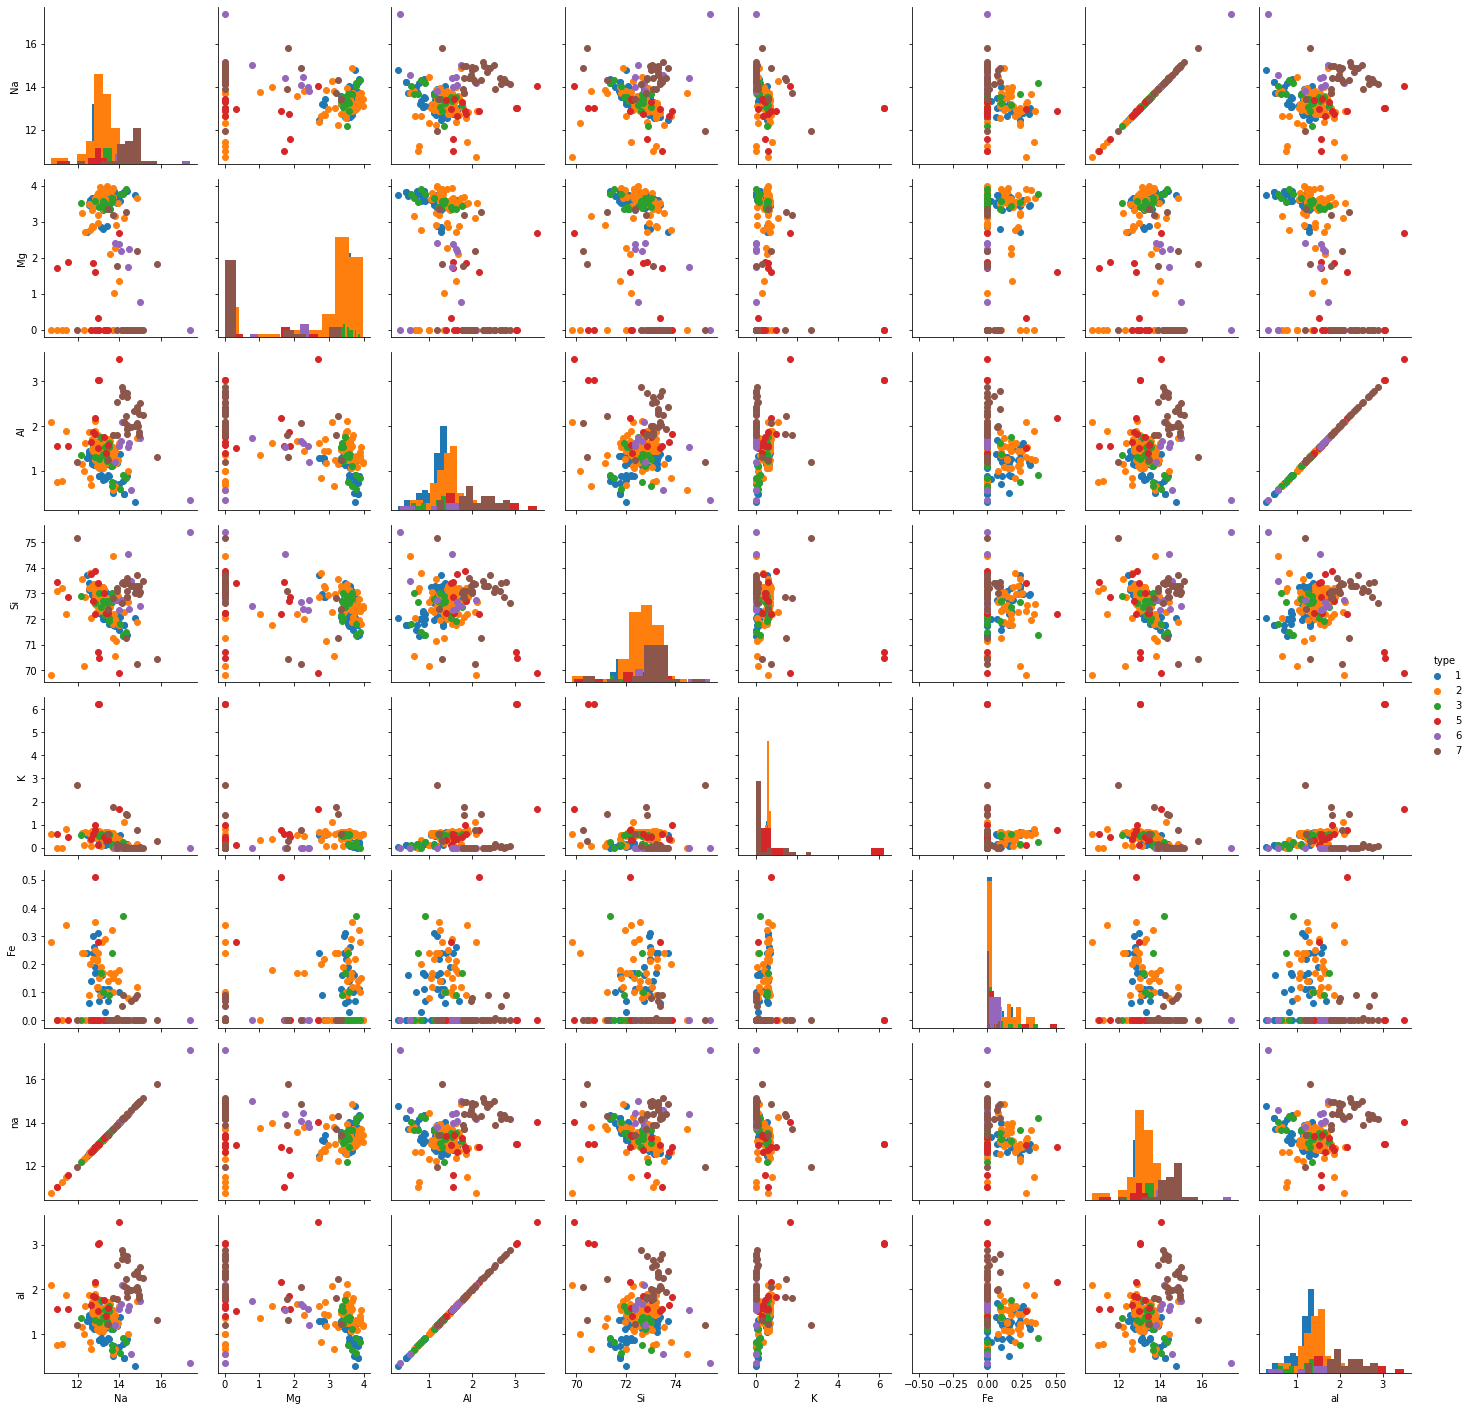

In [10]:
features = ['Na', 'Mg', 'Al',
                  'Si', 'K', 'Fe']

glasss = glass[['Na', 'Al']]
glasss.columns = ['na', 'al']
glass_expanded = pd.concat([glass[features], glass['type'], glasss], axis = 1)

plot = sns.PairGrid(glass_expanded, hue='type') 
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot = plot.add_legend()
plt.show()


PCA

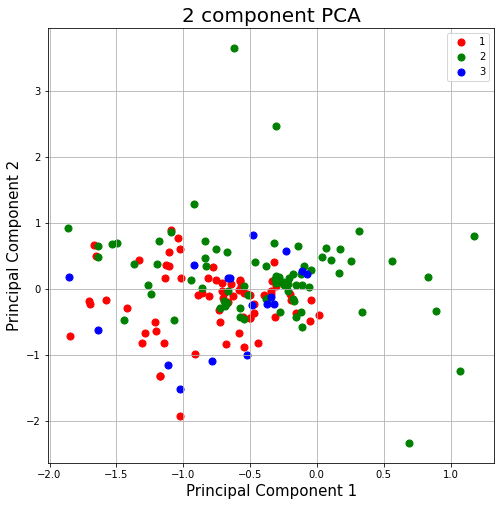

In [11]:
# PCA
x = glass.loc[:, features].values
y = glass.loc[:, ['type']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, glass[['type']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()